#### Pre-requisites

In [238]:
# Importing dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [151]:
# Loading Dataset
dataset = pd.read_csv("C:\\Users\\91798\\Downloads\\archive\\UpdatedResumeDataSet.csv")

#### Gathering insights on the dataset

In [154]:
# Checking the first five rows
dataset.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [156]:
# Checking the last five rows
dataset.tail()

,Category,Resume
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [158]:
# Shape of the dataset

print(f'Number of rows: {dataset.shape[0]}')
print(f'Number of columns: {dataset.shape[1]}')

Number of rows: 962
Number of columns: 2


In [160]:
# Statistical data

dataset.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [162]:
# General information

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


#### Exploring the Category column

In [165]:
# Checking the distribution of 25 unique caegories

category_distribution = dataset["Category"].value_counts()
print(category_distribution)

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64


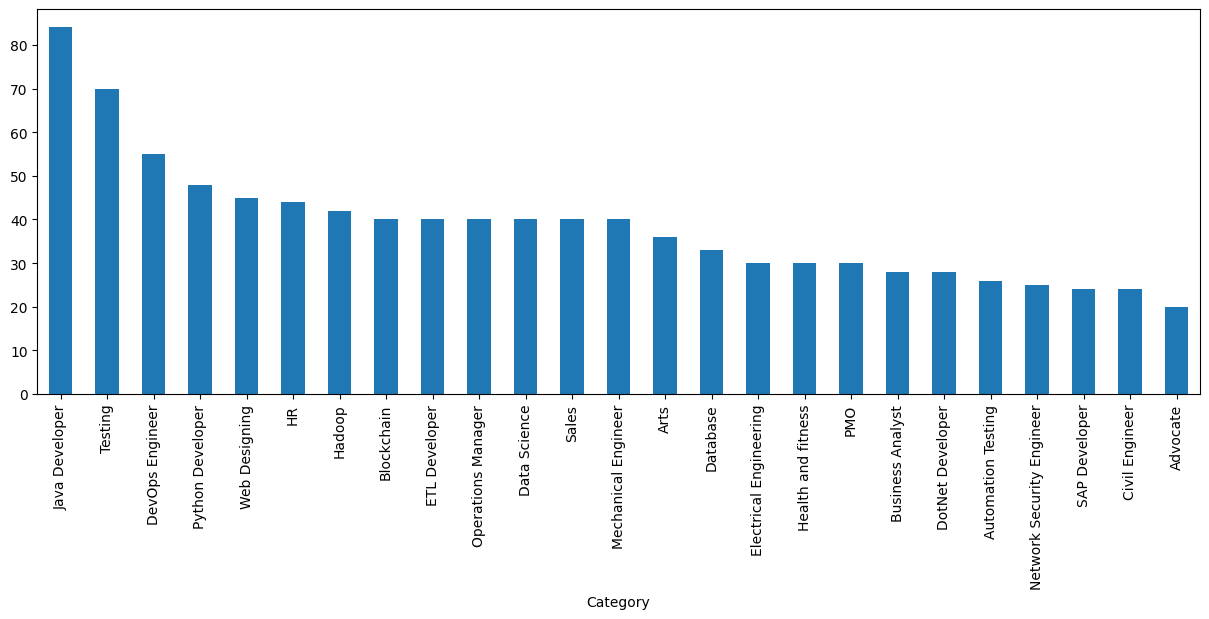

In [167]:
# Plotting a graph to visualize the distribution

plt.figure(figsize=(15, 5))
category_distribution.plot(kind="bar")
plt.xticks(rotation=90)
plt.show()

In [169]:
# Encoding the Category column

label_encoder = LabelEncoder()

dataset["Category"] = label_encoder.fit_transform(dataset["Category"])

In [171]:
dataset["Category"]

0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: Category, Length: 962, dtype: int32

#### Exploring the Resume column

In [174]:
# Checking the first data

dataset['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

##### Observation: Need to do the regular clean up .
1. Convert the whole text into lowercase.
2. Removing stop words.
3. Removing punctuations.

#### Cleaning the Resume column

In [178]:
# Converting into lowercase

dataset['Resume'] = dataset['Resume'].str.lower()

In [180]:
# creating a function to removing punctuations, stop words special characters 

def clean_text(text):
    cleaned_text = re.sub('http\S+\s', ' ', text)
    cleaned_text = re.sub('@\S+', ' ', cleaned_text)
    cleaned_text = re.sub('#\S+\s', ' ', cleaned_text)
    cleaned_text = re.sub(f"[{re.escape(string.punctuation)}]", " ", cleaned_text)
    cleaned_text = re.sub(r'[^\x00-\x7f]', ' ', cleaned_text)
    cleaned_text = re.sub('\s+', ' ', cleaned_text)
    return cleaned_text

In [182]:
dataset['Resume'] = dataset['Resume'].apply(lambda x: clean_text(x))

In [184]:
dataset['Resume'][0]

'skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d3 js dc js plotly kibana matplotlib ggplot tableau others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv and understanding of deep learning education details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 24 monthscompany details company ernst young llp description fraud investigations and dispute services assurance technology assisted review tar technology assisted review assists in accelerating the

#### Vectorizing the Resume column

In [187]:
# Creating an object of Vecotrizer class
vectorizer = TfidfVectorizer()

# Fitting the data
vectorizer.fit(dataset['Resume'])

# Transforming the data
vectorized_resume_column = vectorizer.transform(dataset['Resume'])

#### Splitting the data

In [190]:
# Separating Input column

X = vectorized_resume_column
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 186731 stored elements and shape (962, 7561)>

In [192]:
# Separating Output column

y = dataset.drop('Resume', axis=1)
y

,Category
0,6
1,6
2,6
3,6
4,6
...,...
957,23
958,23
959,23
960,23


In [194]:
# Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Printing shape of train and test datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(769, 7561)
(193, 7561)
(769, 1)
(193, 1)


#### Training the model

In [217]:
# 1. Train KNeighborsClassifier
knn_model = OneVsRestClassifier(KNeighborsClassifier())
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("\nKNeighborsClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_knn)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_knn)}")


KNeighborsClassifier Results:
Accuracy: 0.9845
Confusion Matrix:
[[ 4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 11  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  

In [219]:
# 2. Train SVC
svc_model = OneVsRestClassifier(SVC())
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
print("\nSVC Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_svc)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_svc)}")


SVC Results:
Accuracy: 0.9948
Confusion Matrix:
[[ 4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 11  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0 

In [221]:
# 3. Train RandomForestClassifier
rf_model = OneVsRestClassifier(RandomForestClassifier())
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandomForestClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")


RandomForestClassifier Results:
Accuracy: 0.9948
Confusion Matrix:
[[ 4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 11  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0

#### Conclusion: SVC model and Random Forest are giving the highest accuracy.

##### Dumping with pickle

In [228]:
# Dumping the vectorizer
pickle.dump(clean_text, open('clean_text.pkl', 'wb'))
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))
pickle.dump(classifier, open('svc_model.pkl', 'wb'))

##### Loading with Pickle and testing

In [233]:
text_cleaner = pickle.load(open('clean_text.pkl', 'rb'))
text_vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))
classifier_model = pickle.load(open('svc_model.pkl', 'rb'))

NOTE: run cell #2 before running this

In [211]:
# Creating a dummy test variable
test_resume = dataset['Resume'][3]
test_resume

'skills r python sap hana tableau sap hana sql sap hana pal ms sql sap lumira c linear programming data modelling advance analytics scm analytics retail analytics social media analytics nlp education details january 2017 to january 2018 pgdm business analytics great lakes institute of management illinois institute of technology january 2013 bachelor of engineering electronics and communication bengaluru karnataka new horizon college of engineering bangalore visvesvaraya technological university data science consultant consultant deloitte usi skill details linear programming exprience 6 months retail exprience 6 months retail marketing exprience 6 months scm exprience 6 months sql exprience less than 1 year months deep learning exprience less than 1 year months machine learning exprience less than 1 year months python exprience less than 1 year months r exprience less than 1 year monthscompany details company deloitte usi description the project involved analysing historic deals and com

In [213]:
# Tranforming the input text

# Cleaning the text
cleaned_text = text_cleaner(test_resume)

# Vectorizing text
transformed_text = text_vectorizer.transform([cleaned_text])

# Predicting
prediction = classifier_model.predict(transformed_text)

In [145]:
print(f"This CV is for {prediction}")

This CV is for [6]
